In [129]:
import matplotlib.pyplot as plt
import numpy as np
from helpers import *

In [130]:
def plot_volume(f,tmin,tmax,axes=False,**kwargs):
    plot_function(f,tmin,tmax,tlabel="time (hr)", xlabel="volume (bbl)", axes=axes, **kwargs)

def plot_flow_rate(f,tmin,tmax,axes=False,**kwargs):
    plot_function(f,tmin,tmax,tlabel="time (hr)", xlabel="flow rate (bbl/hr)", axes=axes, **kwargs)

In [131]:
def volume(t):
    return (t-4)**3 / 64 + 3.3

def flow_rate(t):
    return 3*(t-4)**2 / 64

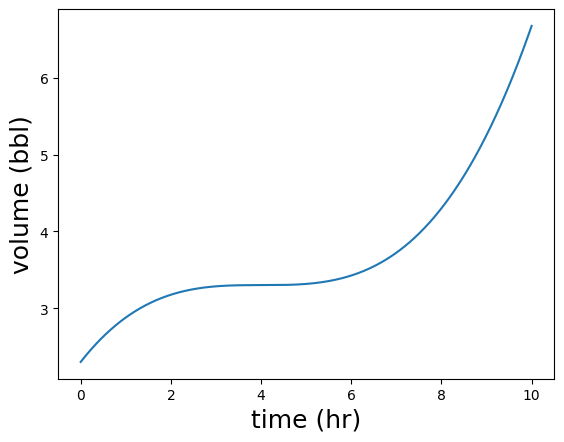

In [186]:
plot_volume(volume, 0, 10, axes=False)

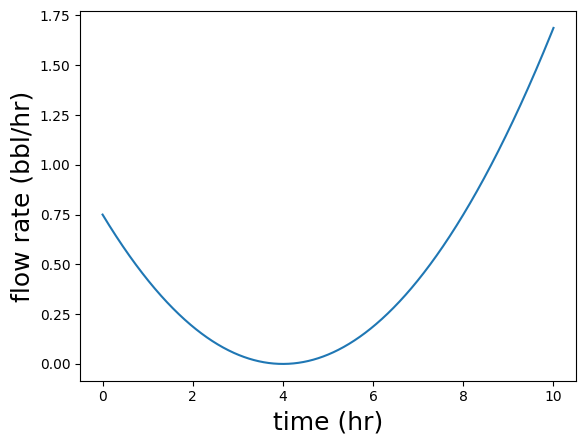

In [133]:
plot_flow_rate(flow_rate, 0, 10)

## 8.1　根据体积计算平均流速

In [134]:
def average_flow_rate(v, t1, t2):
    return (v(t2) - v(t1))/(t2 - t1)

In [135]:
average_flow_rate(volume, 4, 9)

0.390625

负变化率

In [136]:
def decreasing_volume(t):
    if t < 5:
        return 10 - (t**2)/5
    else:
        return 0.2*(10-t)**2

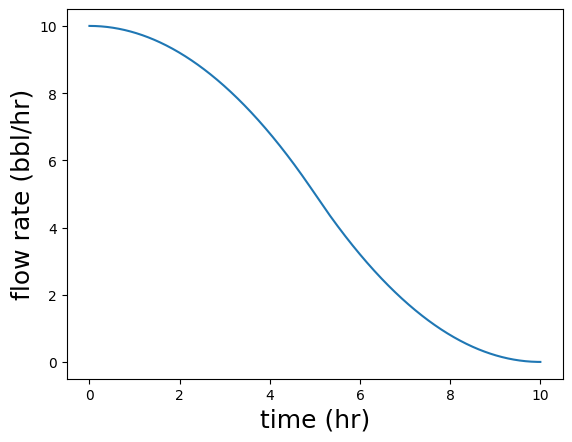

In [137]:
plot_flow_rate(decreasing_volume, 0, 10)

In [138]:
average_flow_rate(decreasing_volume, 0, 3)

-0.6000000000000002

练习8.2：
实现一个Python函数secant_line(f,x1,x2)，它接收函数f(x)以及两个值x1和x2，并返回一个表示随时间变化割线的新函数。例如，运行line = secant_line(f,x1,x2)，那么line(3)将给出割线在时的值。

In [139]:
def secant_line(f, x1, x2):
    def line(x):
        y1 = f(x1)
        y2 = f(x2)
        return y1 + (y2 - y1) / (x2 - x1) * (x - x1)
    return line

2.909375


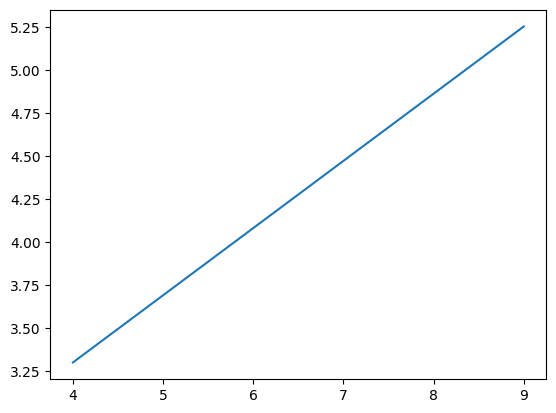

In [140]:
sl = secant_line(volume, 4, 9)
print(sl(3))
plot_function(sl, 4, 9)

练习8.3：实现一个函数，使用上一个练习中的代码在两个给定点之间绘制函数f的割线。

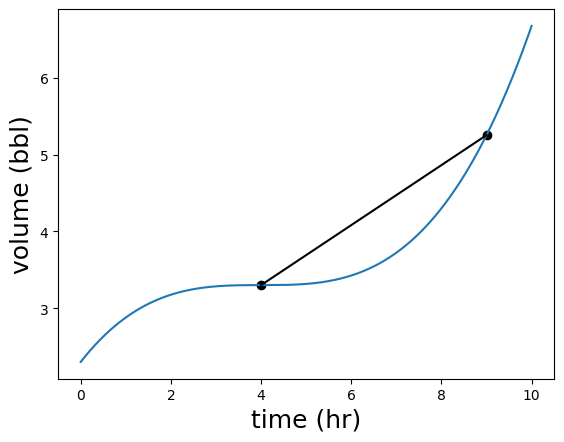

In [141]:
def plot_scant(f, t1, t2, color='k'):
    line = secant_line(f, t1, t2)
    plot_function(line, t1, t2, c=color)
    plt.scatter([t1, t2], [f(t1), f(t2)], c=color)
plot_volume(volume, 0, 10)
plot_scant(volume, 4, 9)

## 8.2　绘制随时间变化的平均流速
### 8.2.1　计算不同时间段内的平均流速

In [142]:
import numpy as np
np.arange(0, 10, 0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [143]:
def interval_flow_rates(v, t1, t2, dt):
    return [(t, average_flow_rate(v, t, t+dt)) for t in np.arange(t1, t2, dt)]

In [144]:
interval_flow_rates(volume, 0, 10, 1)

[(0, 0.578125),
 (1, 0.296875),
 (2, 0.109375),
 (3, 0.015625),
 (4, 0.015625),
 (5, 0.109375),
 (6, 0.296875),
 (7, 0.578125),
 (8, 0.953125),
 (9, 1.421875)]

In [145]:
def plot_intreval_flow_rates(v, t1, t2, dt):
    series = interval_flow_rates(v, t1, t2, dt)
    times = [t for (t, _) in series]
    rates = [q for (_, q) in series]
    plt.scatter(times, rates)

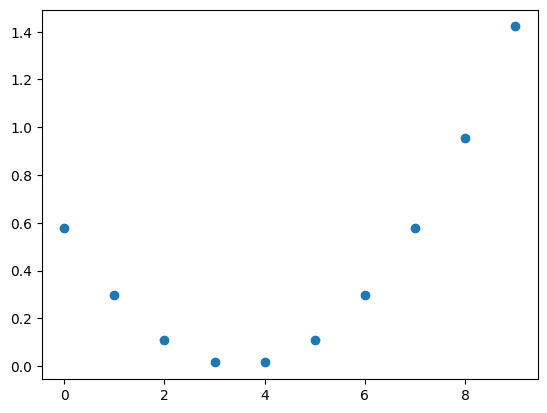

In [146]:
plot_intreval_flow_rates(volume, 0, 10, 1)

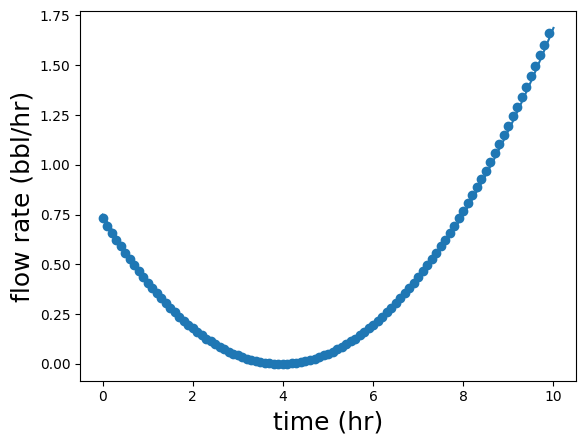

In [147]:
plot_flow_rate(flow_rate, 0, 10)
plot_intreval_flow_rates(volume, 0, 10, 0.1)

练习8.4：以0.5 h为间隔，绘制decreasing_volume函数流速随时间的变化图。什么时候其流速为最小值？也就是说，石油什么时候离开油箱的速度最快？

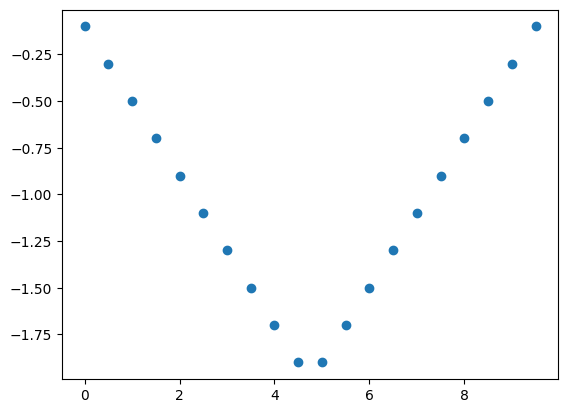

In [148]:
plot_intreval_flow_rates(decreasing_volume, 0, 10, 0.5)


练习8.5：实现linear_volume_function函数，并画出流速随时间的变化图，以说明流速是恒定的。

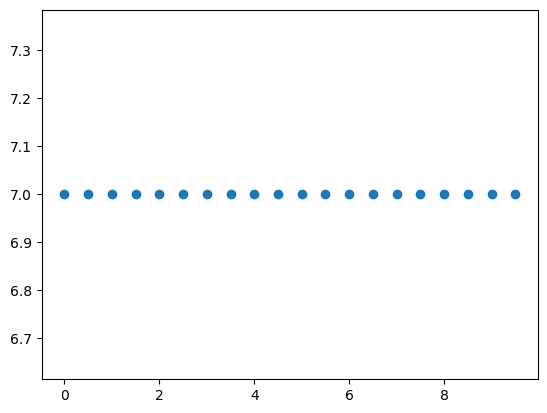

In [149]:
def linear_volume_function(t):
    return 7*t + 5
plot_intreval_flow_rates(linear_volume_function, 0, 10, 0.5)

### 8.3.1 计算小割线的斜率

In [150]:
average_flow_rate(volume, 0.999999, 1.000001)

0.4218750000563785

In [151]:
average_flow_rate(volume, 0.99999, 1.00001)

0.4218750000002602

In [152]:
flow_rate(1)

0.421875

In [153]:
def instantaneous_flow_rate(v, t, digits=6):
    tolerance = 10**(-digits)
    h = 1
    approx = average_flow_rate(v, t-h, t+h)
    for i in range(0, 2*digits):
        h = h/10
        next_approx = average_flow_rate(v, t-h, t+h)
        if abs(approx-next_approx) < tolerance:
            return round(approx, digits)
        else:
            approx = next_approx
    raise Exception('Derivative did not converge')

In [154]:
instantaneous_flow_rate(volume, 1)

0.421875

### 8.3.3　柯里化并绘制瞬时流速函数

In [155]:
def get_flow_rate_function(v):
    def flow_rate_function(t):
        instantaneous_flow_rate(v, t)
    return flow_rate_function

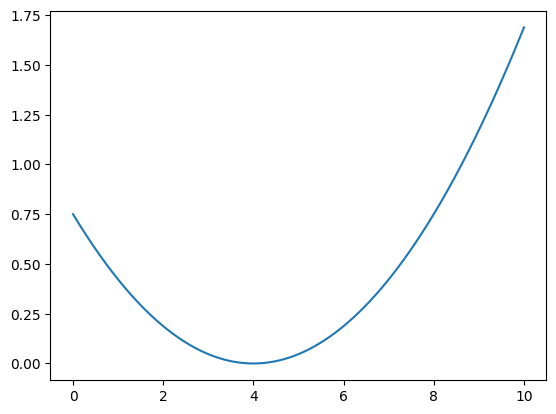

In [156]:
plot_function(flow_rate,0, 10)
plot_function(get_flow_rate_function(volume), 0, 10)

探索：利用numpy求导数

volume的定义：

```
def volume(t):
    return (t-4)**3 / 64 + 3.3
```

In [157]:
import sympy
t = sympy.symbols('t')
f = (t-4)**3 / 64 + 3.3
expended = sympy.expand(f)
print(expended)

t**3/64 - 3*t**2/16 + 3*t/4 + 2.3


In [158]:
p_volume = np.poly1d([1/64, -3/16, 3/4, 2.3])
volume_derrivative = p_volume.deriv()
volume_derrivative(1)

0.421875

探索：利用sympy求导数

In [159]:
t = sympy.symbols('t')
sympy.diff(t**3/64 - 3*t**2/16 + 3*t/4 + 2.3, t)

3*t**2/64 - 3*t/8 + 3/4

In [160]:
def derrivative_volume(t):
    return 3/64*t**2 - 3/8*t + 3/4
derrivative_volume(1)

0.421875

### 练习8.6：证明volume函数的图形在0.999 h到1.001 h的间隔上不是一条直线。

In [161]:
volume(1)

2.878125

In [162]:
sl = secant_line(volume, 0.999, 1.001)
sl(1)

2.8781248593749997

### 练习8.7：通过在t=8附近计算越来越短的切线的斜率，近似计算处t=8体积图的切线斜率。

In [163]:
average_flow_rate(volume, 7.9, 8.1)

0.7501562500000007

In [164]:
average_flow_rate(volume, 7.99, 8.01)

0.750001562499996

In [165]:
average_flow_rate(volume, 7.999, 8.001)

0.7500000156249458

### 练习8.8：对于使用Python实现的sign函数，证明该函数在x=0处不存在导数。

In [166]:
def sign(x):
    return x / abs(x)

In [167]:
average_flow_rate(sign, -0.1, 0.1)

10.0

In [168]:
average_flow_rate(sign, -0.01, 0.01)

100.0

In [169]:
average_flow_rate(sign, -0.001, 0.001)

1000.0

## 8.4　体积变化的近似值

In [170]:
def small_volume_change(q, t, dt):
    return q(t) * dt

In [171]:
small_volume_change(flow_rate, 1, 0.1)

0.0421875

In [172]:
volume(1.01) - volume(1)

0.004204703125000098

In [173]:
def volume_change(q, t1, t2, dt):
    return sum(small_volume_change(q, t, dt) for t in np.arange(t1, t2, dt))

In [174]:
volume_change(flow_rate, 0, 10, 0.1)

4.32890625

In [175]:
volume(10) - volume(0)

4.375

In [176]:
volume_change(flow_rate, 0, 10, 0.0001)

4.3749531257812455

### 练习8.9：在前6小时内大约有多少石油被添加到油箱中？在最后4小时内呢？哪段时间内添加的石油更多？

In [177]:
volume_change(flow_rate, 0, 6, 0.01)

1.1278171874999996

In [178]:
volume_change(flow_rate, 6, 10, 0.01)

3.2425031249999257

### 8.5　绘制随时间变化的体积图

In [179]:
def approximate_volume(q,v0,dt,T):
    return v0 + volume_change(q, 0, T, dt)

def approximate_volume_function(q, v0, dt):
    def volume_function(t):
        return approximate_volume(q, v0, dt, t)
    return volume_function

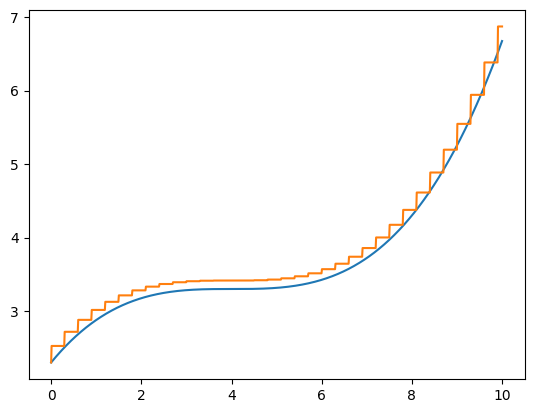

In [180]:
v0 = volume(0)
plot_function(volume, 0, 10)
plot_function(approximate_volume_function(flow_rate, v0, 0.3), 0, 10)

In [181]:
def get_volume_function(q, v0, digits=6):
    def volume_function(T):
        tolerance = 10**(-digits)
        dt = 1
        approx = approximate_volume(q, v0, dt, T)
        for i in range(0, digits*2):
            dt = dt/10
            next_approx = approximate_volume(q, v0, dt, T)
            if abs(approx-next_approx)< tolerance:
                return round(next_approx, digits)
            else:
                approx = next_approx
        raise Exception("Did not converge!")
    return volume_function

In [182]:
volume(1)

2.878125

In [183]:
xv = get_volume_function(flow_rate, 2.3, 3)
xv(1)

2.878

In [184]:
xv = get_volume_function(flow_rate, 2.3, 6)
xv(1)

2.878125